# Inventory Classification 

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d shahriarkabir/abc-xyz-inventory-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/shahriarkabir/abc-xyz-inventory-classification-dataset
License(s): CC0-1.0
100%|███████████████████████████████████████| 41.9k/41.9k [00:00<00:00, 167kB/s]
100%|███████████████████████████████████████| 41.9k/41.9k [00:00<00:00, 167kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Inventory Classification /abc-xyz-inventory-classification-dataset.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Inventory Classification ')
zip_ref.close()

## Explaratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("abc_xyz_dataset.csv")

In [5]:
df.head()

,Item_ID,Item_Name,Category,Jan_Demand,Feb_Demand,Mar_Demand,Apr_Demand,May_Demand,Jun_Demand,Jul_Demand,Aug_Demand,Sep_Demand,Oct_Demand,Nov_Demand,Dec_Demand,Total_Annual_Units,Price_Per_Unit,Total_Sales_Value
0,ITM_001,Surface Near,Grocery,4516,4069,4664,4653,4508,4125,4669,4210,4824,4497,4259,4782,53776,10,537760
1,ITM_002,Central Him,Grocery,4792,4964,4628,4660,4897,5015,4805,4686,4896,4536,4520,5054,57453,100,5745300
2,ITM_003,Win Everyone,Apparel,61,175,38,43,15,161,224,41,387,340,70,21,1576,2,3152
3,ITM_004,Task Save,Apparel,1145,1113,717,832,783,954,1047,894,994,978,1136,712,11305,2,22610
4,ITM_005,Hotel Teacher,Grocery,1494,2051,1400,1918,1669,1733,1695,1560,1679,1381,1591,1662,19833,10,198330


In [6]:
df.shape

(1000, 18)

In [7]:
df.size

18000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Item_ID             1000 non-null   object
 1   Item_Name           1000 non-null   object
 2   Category            1000 non-null   object
 3   Jan_Demand          1000 non-null   int64 
 4   Feb_Demand          1000 non-null   int64 
 5   Mar_Demand          1000 non-null   int64 
 6   Apr_Demand          1000 non-null   int64 
 7   May_Demand          1000 non-null   int64 
 8   Jun_Demand          1000 non-null   int64 
 9   Jul_Demand          1000 non-null   int64 
 10  Aug_Demand          1000 non-null   int64 
 11  Sep_Demand          1000 non-null   int64 
 12  Oct_Demand          1000 non-null   int64 
 13  Nov_Demand          1000 non-null   int64 
 14  Dec_Demand          1000 non-null   int64 
 15  Total_Annual_Units  1000 non-null   int64 
 16  Price_Per_Unit      1000 

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Jan_Demand,1000.0,1418.515,1.489353e+03,24.0,282.75,539.5,2478.50,5276.0
Feb_Demand,1000.0,1418.394,1.488076e+03,7.0,279.00,558.0,2529.25,5171.0
Mar_Demand,1000.0,1421.239,1.496500e+03,2.0,278.00,591.5,2515.75,5271.0
Apr_Demand,1000.0,1409.242,1.489281e+03,8.0,278.00,558.0,2427.00,5186.0
May_Demand,1000.0,1411.762,1.488621e+03,9.0,280.00,541.5,2461.25,5384.0
Jun_Demand,1000.0,1412.853,1.490569e+03,15.0,277.75,598.0,2451.50,5462.0
Jul_Demand,1000.0,1410.558,1.497773e+03,6.0,267.00,555.0,2547.50,5504.0
Aug_Demand,1000.0,1403.721,1.484283e+03,2.0,283.00,550.5,2407.75,5219.0
Sep_Demand,1000.0,1411.109,1.482689e+03,2.0,282.00,547.0,2472.75,5240.0
Oct_Demand,1000.0,1411.700,1.484763e+03,11.0,277.00,591.0,2492.50,5189.0


In [10]:
df.isnull().sum()

Item_ID               0
Item_Name             0
Category              0
Jan_Demand            0
Feb_Demand            0
Mar_Demand            0
Apr_Demand            0
May_Demand            0
Jun_Demand            0
Jul_Demand            0
Aug_Demand            0
Sep_Demand            0
Oct_Demand            0
Nov_Demand            0
Dec_Demand            0
Total_Annual_Units    0
Price_Per_Unit        0
Total_Sales_Value     0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.nunique()

Item_ID               1000
Item_Name             1000
Category                 5
Jan_Demand             790
Feb_Demand             790
Mar_Demand             803
Apr_Demand             784
May_Demand             799
Jun_Demand             792
Jul_Demand             786
Aug_Demand             781
Sep_Demand             796
Oct_Demand             789
Nov_Demand             802
Dec_Demand             802
Total_Annual_Units     982
Price_Per_Unit           6
Total_Sales_Value      992
dtype: int64

In [13]:
df['Category'].value_counts()

Category
Grocery           402
Apparel           216
Electronics       193
Home & Kitchen    100
Toys               89
Name: count, dtype: int64

## Data Visualization

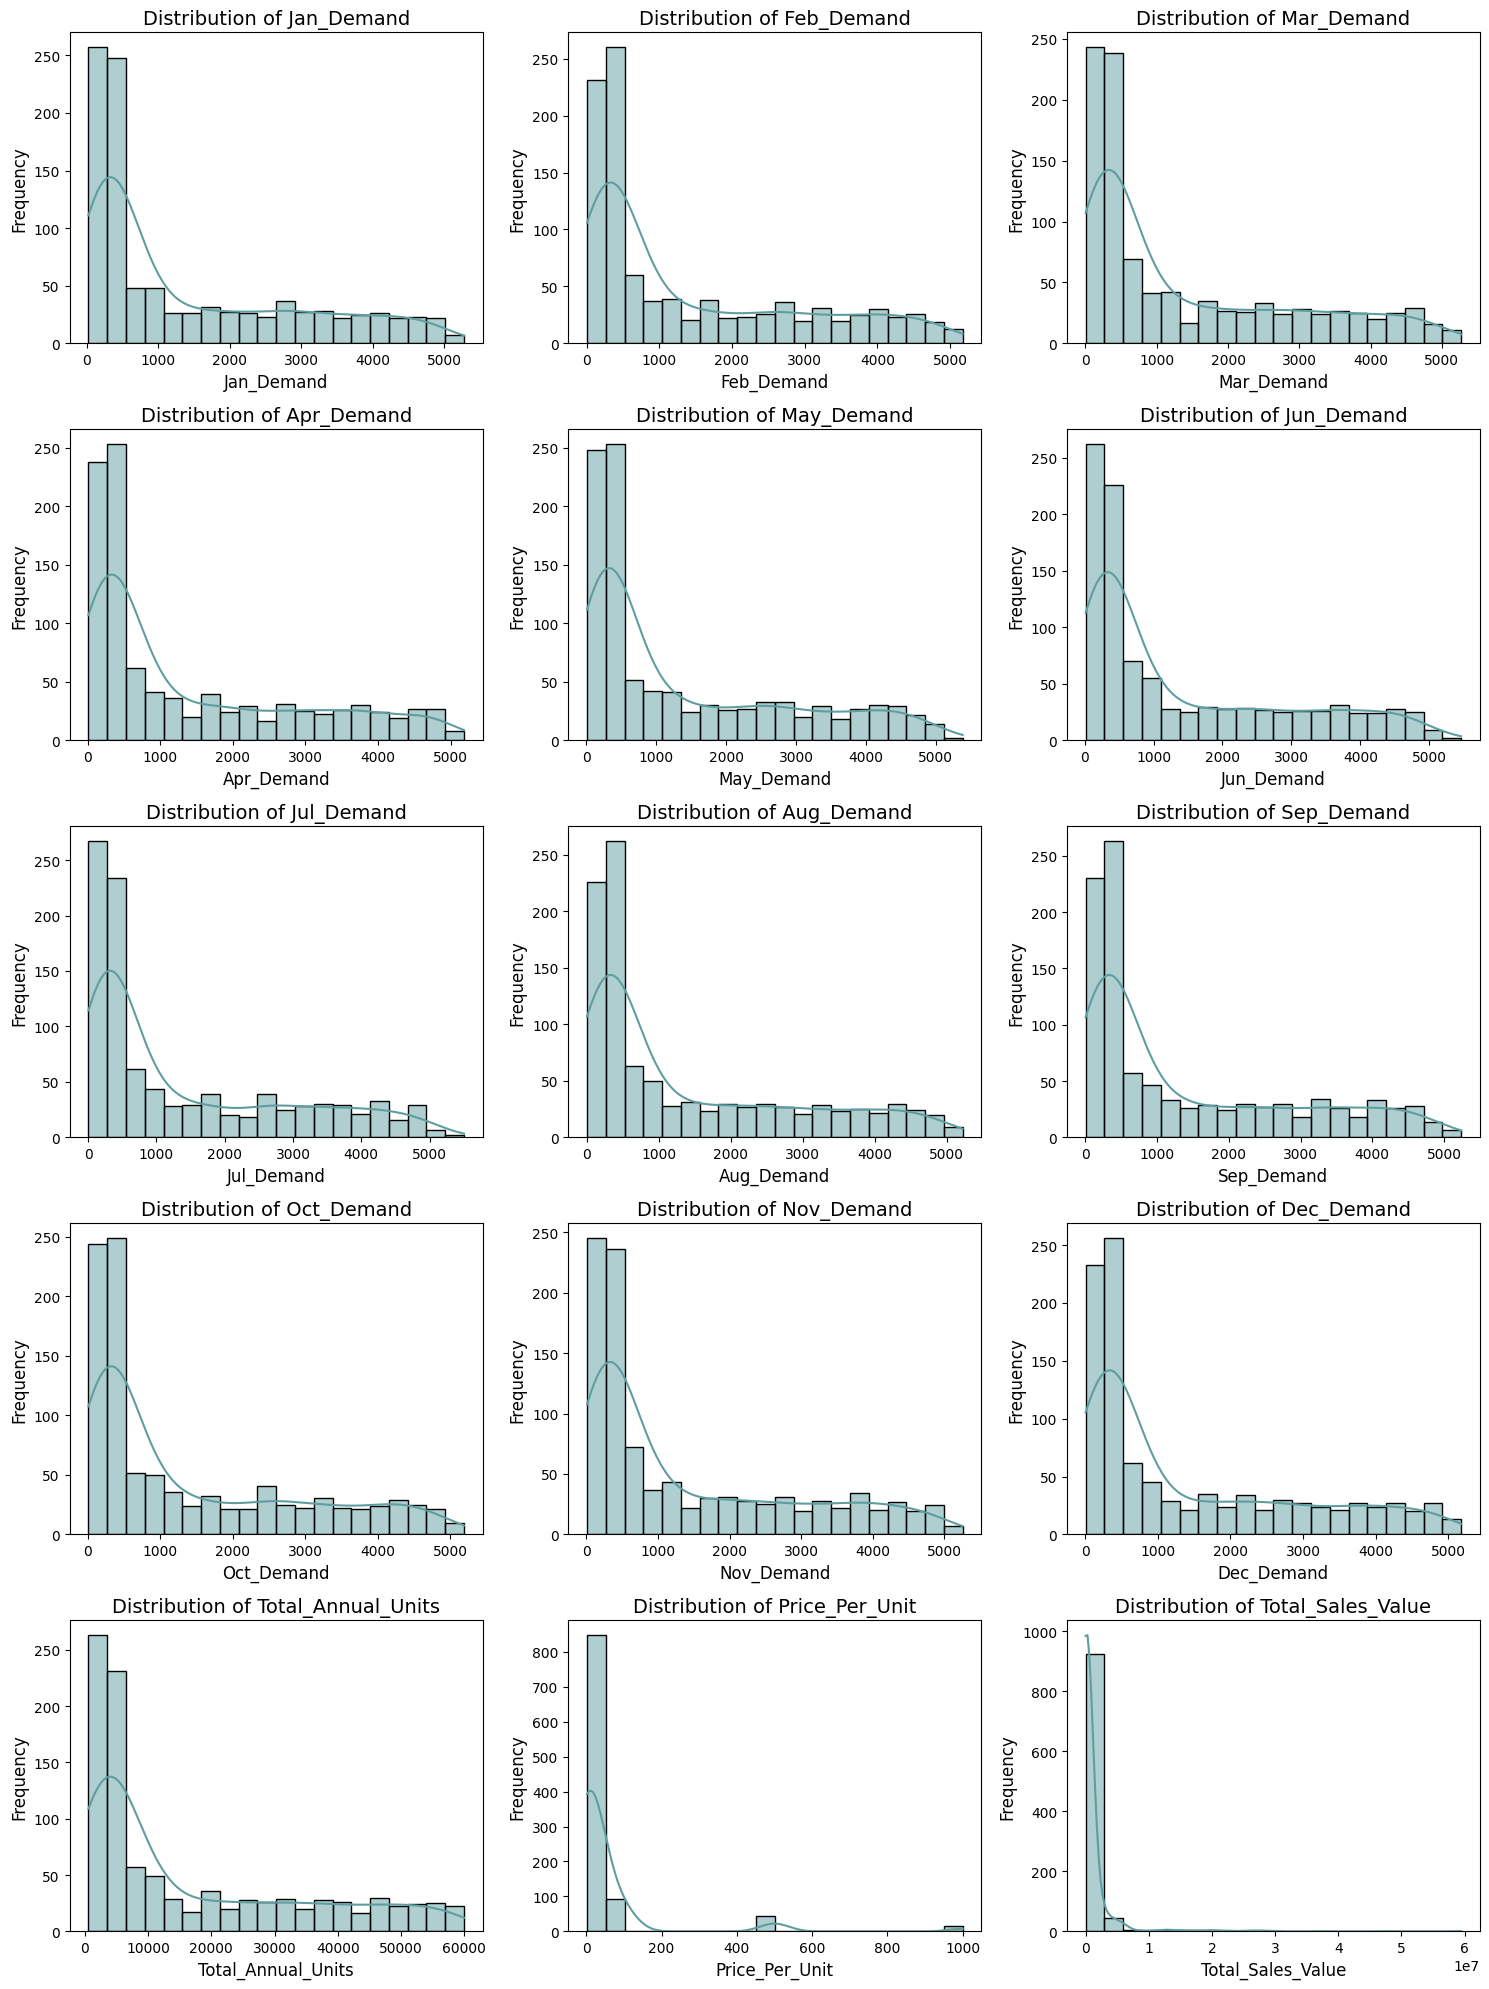

In [14]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

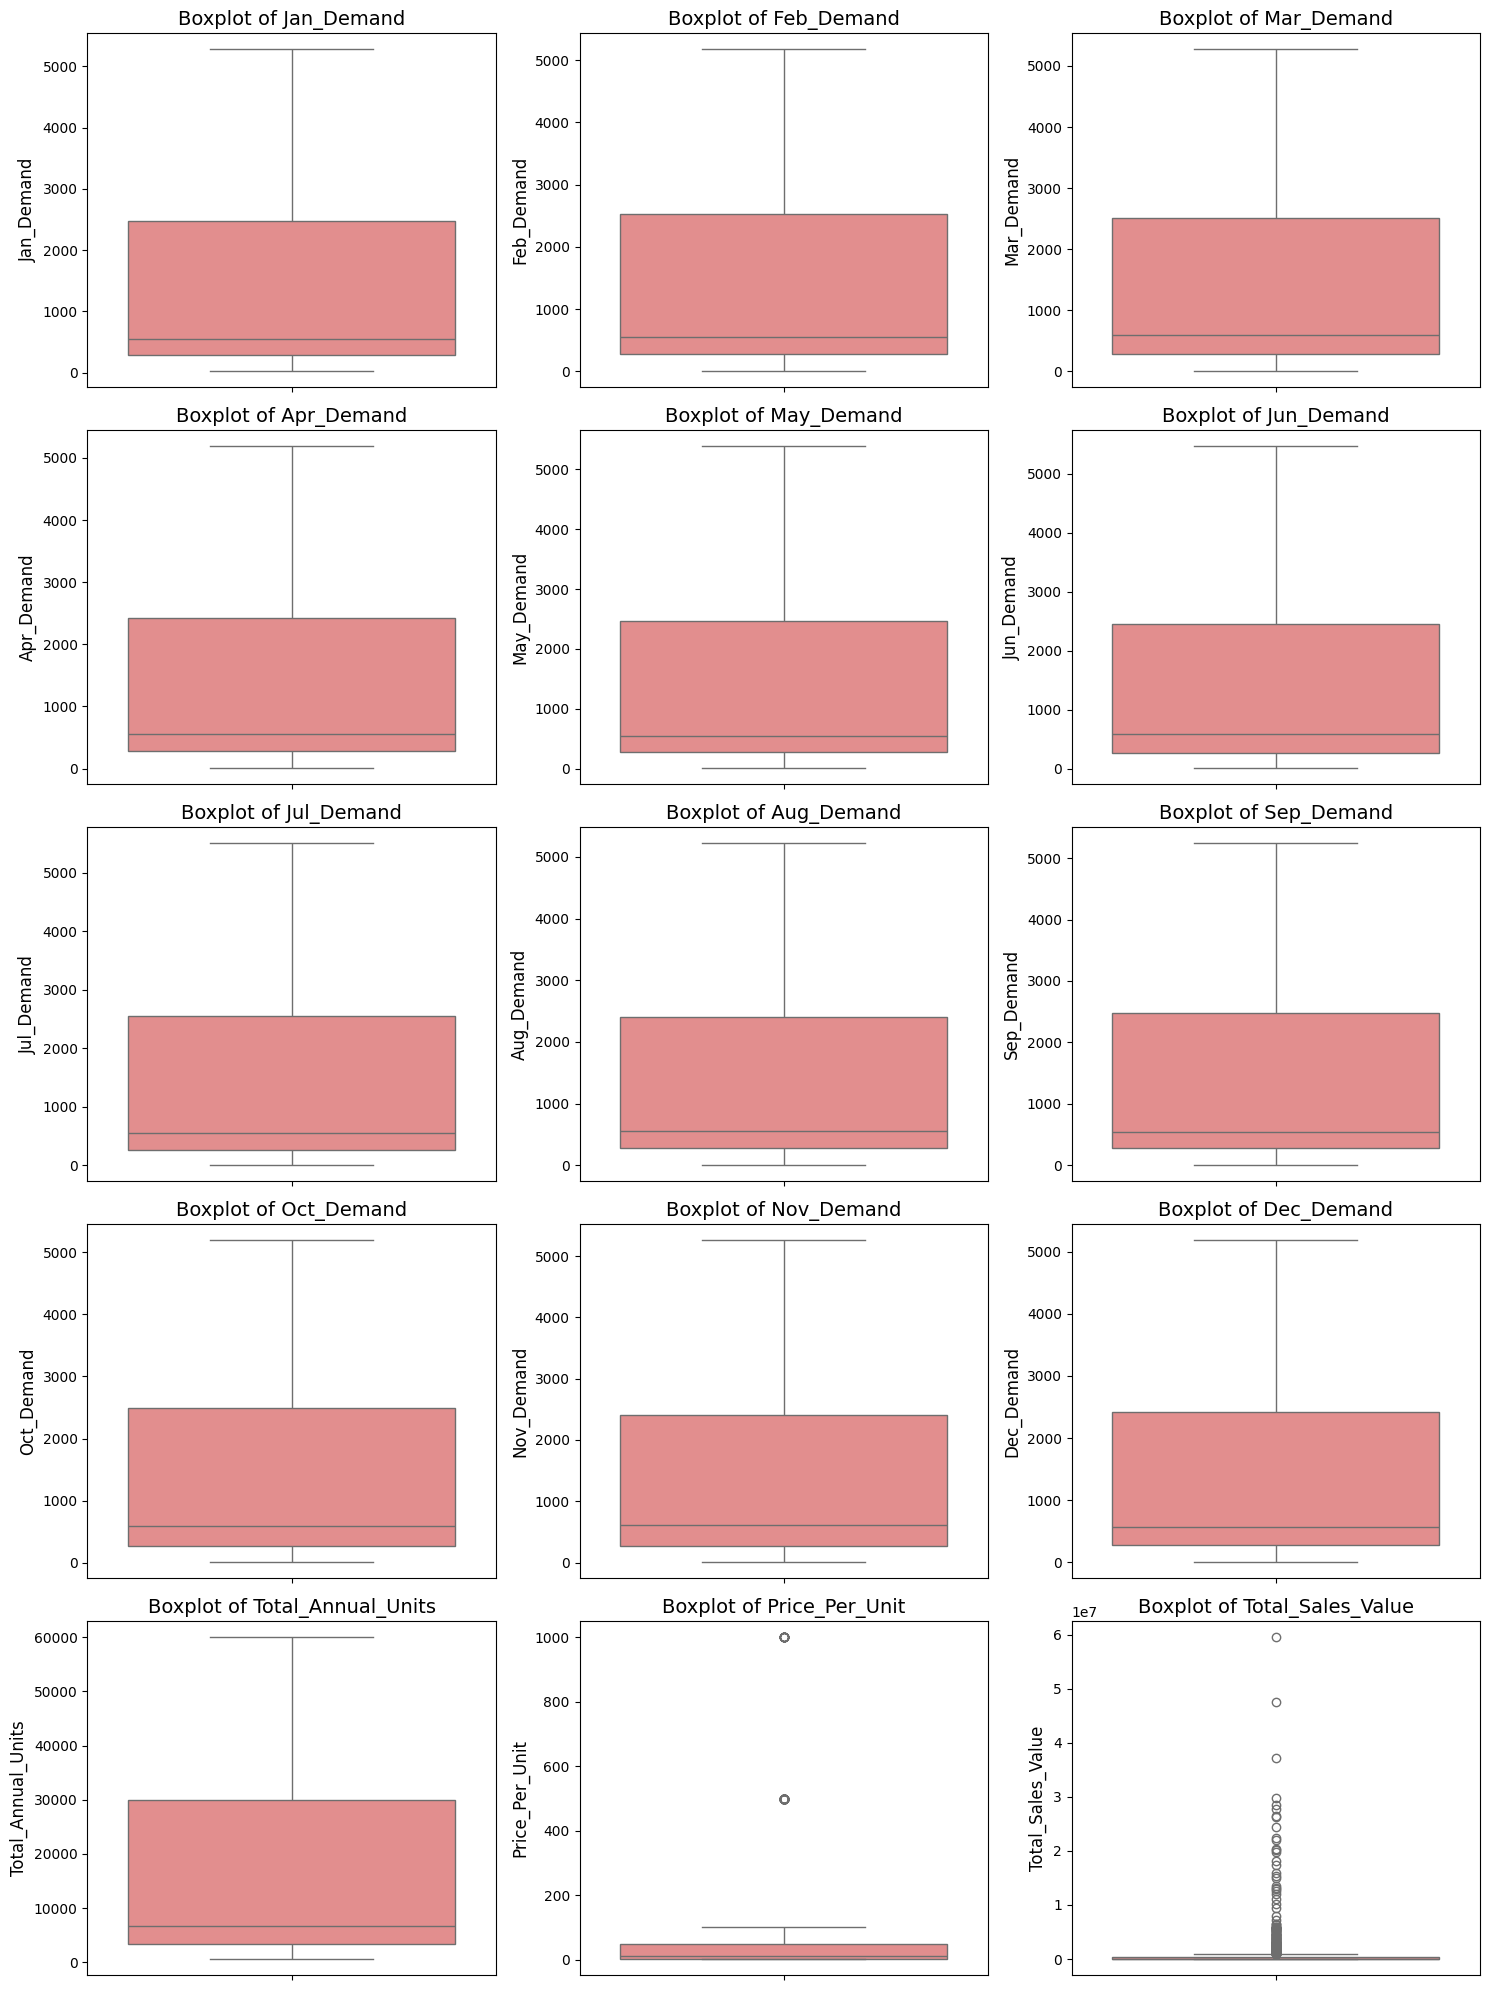

In [15]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

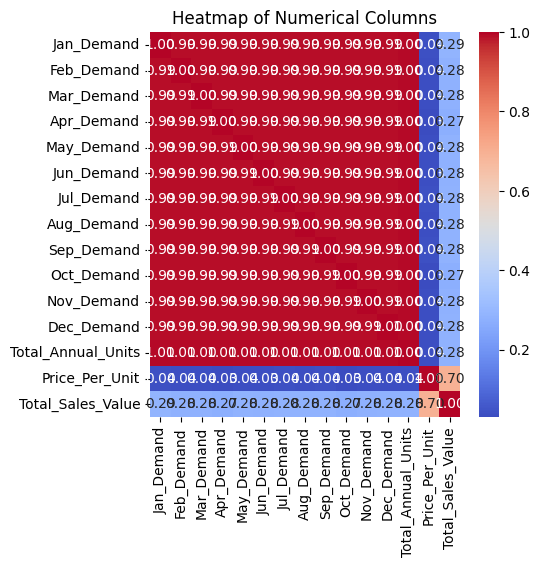

In [16]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(5, 5))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [17]:
# Dropping id column

df.drop(columns=['Item_ID'], inplace=True)

In [18]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [19]:
X = df.drop(columns=['Category'])
y = df['Category']

In [20]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building

In [22]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [24]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.705, 0.685, 0.745, 0.74, 0.74, 0.75, 0.77, 0.76, 0.725]


## Model Evalaution

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.65      0.61        40
           1       0.38      0.77      0.51        30
           2       0.97      0.99      0.98        93
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00        16

    accuracy                           0.70       200
   macro avg       0.39      0.48      0.42       200
weighted avg       0.62      0.70      0.65       200

Confusion Matrix:
 [[26 11  3  0  0]
 [ 7 23  0  0  0]
 [ 1  0 92  0  0]
 [ 8 13  0  0  0]
 [ 3 13  0  0  0]]


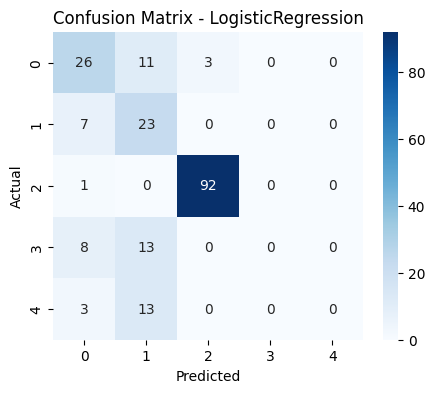

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.62      0.56        40
           1       0.40      0.70      0.51        30
           2       0.93      0.98      0.95        93
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00        16

    accuracy                           0.69       200
   macro avg       0.37      0.46      0.40       200
weighted avg       0.59      0.69      0.63       200

Confusion Matrix:
 [[25  8  7  0  0]
 [ 9 21  0  0  0]
 [ 2  0 91  0  0]
 [ 8 13  0  0  0]
 [ 5 11  0  0  0]]


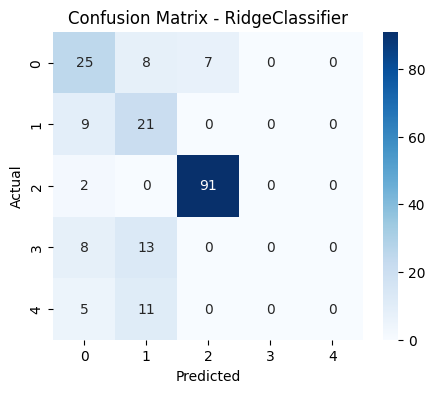

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92        40
           1       0.39      0.57      0.46        30
           2       0.98      0.99      0.98        93
           3       0.20      0.10      0.13        21
           4       0.19      0.19      0.19        16

    accuracy                           0.74       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.74      0.74      0.74       200

Confusion Matrix:
 [[35  1  2  0  2]
 [ 0 17  0  5  8]
 [ 1  0 92  0  0]
 [ 0 16  0  2  3]
 [ 0 10  0  3  3]]


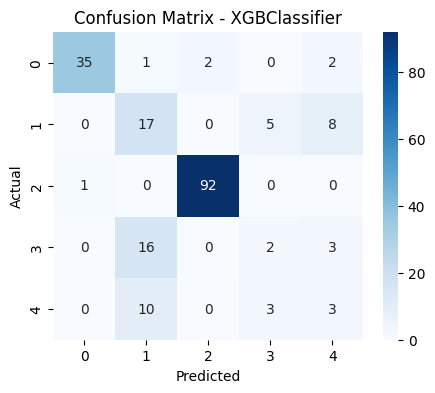

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94        40
           1       0.38      0.63      0.47        30
           2       0.97      0.99      0.98        93
           3       0.33      0.14      0.20        21
           4       0.11      0.06      0.08        16

    accuracy                           0.76       200
   macro avg       0.55      0.55      0.53       200
weighted avg       0.75      0.76      0.74       200

Confusion Matrix:
 [[36  1  3  0  0]
 [ 0 19  0  5  6]
 [ 1  0 92  0  0]
 [ 0 16  0  3  2]
 [ 0 14  0  1  1]]


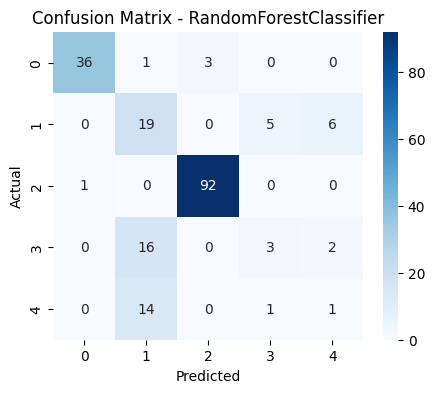

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81        40
           1       0.42      0.97      0.59        30
           2       0.99      0.94      0.96        93
           3       0.20      0.05      0.08        21
           4       0.00      0.00      0.00        16

    accuracy                           0.74       200
   macro avg       0.49      0.54      0.49       200
weighted avg       0.71      0.74      0.70       200

Confusion Matrix:
 [[31  4  1  3  1]
 [ 0 29  0  1  0]
 [ 6  0 87  0  0]
 [ 0 20  0  1  0]
 [ 0 16  0  0  0]]


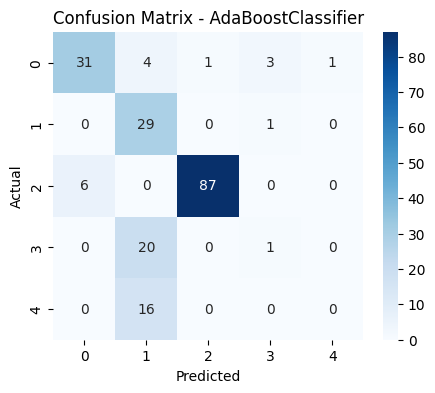

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        40
           1       0.39      0.63      0.48        30
           2       0.99      0.98      0.98        93
           3       0.18      0.10      0.12        21
           4       0.00      0.00      0.00        16

    accuracy                           0.75       200
   macro avg       0.50      0.53      0.51       200
weighted avg       0.73      0.75      0.73       200

Confusion Matrix:
 [[38  0  1  0  1]
 [ 0 19  0  8  3]
 [ 2  0 91  0  0]
 [ 0 15  0  2  4]
 [ 0 15  0  1  0]]


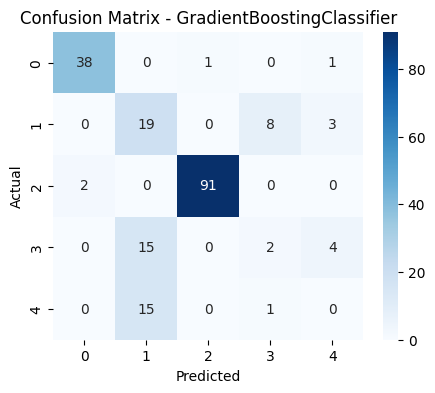

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92        40
           1       0.38      0.60      0.47        30
           2       0.97      0.98      0.97        93
           3       0.38      0.24      0.29        21
           4       0.00      0.00      0.00        16

    accuracy                           0.75       200
   macro avg       0.54      0.54      0.53       200
weighted avg       0.74      0.75      0.74       200

Confusion Matrix:
 [[36  1  3  0  0]
 [ 0 18  0  5  7]
 [ 2  0 91  0  0]
 [ 0 15  0  5  1]
 [ 0 13  0  3  0]]


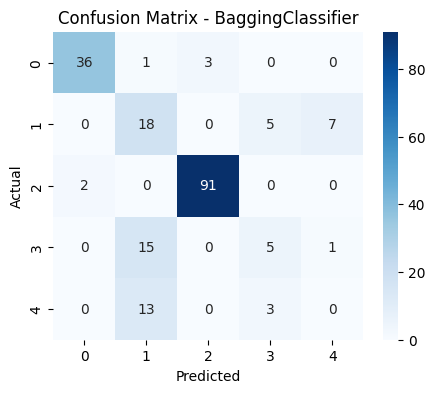

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89        40
           1       0.39      0.57      0.46        30
           2       0.97      0.98      0.97        93
           3       0.24      0.19      0.21        21
           4       0.56      0.31      0.40        16

    accuracy                           0.76       200
   macro avg       0.62      0.58      0.59       200
weighted avg       0.77      0.76      0.75       200

Confusion Matrix:
 [[34  1  3  1  1]
 [ 0 17  0 11  2]
 [ 2  0 91  0  0]
 [ 0 16  0  4  1]
 [ 0 10  0  1  5]]


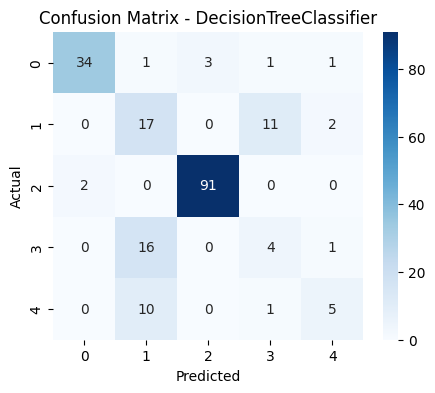

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        40
           1       0.37      0.87      0.52        30
           2       0.99      0.96      0.97        93
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00        16

    accuracy                           0.72       200
   macro avg       0.42      0.51      0.45       200
weighted avg       0.67      0.72      0.68       200

Confusion Matrix:
 [[30  9  1  0  0]
 [ 4 26  0  0  0]
 [ 4  0 89  0  0]
 [ 2 19  0  0  0]
 [ 0 16  0  0  0]]


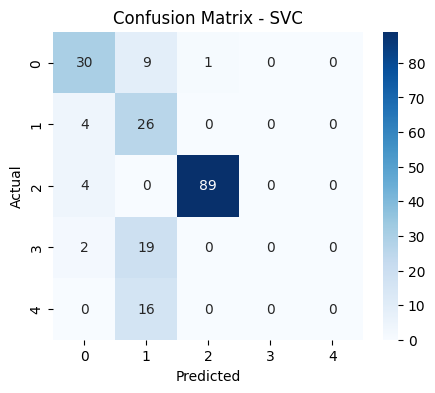

In [25]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()